# Fitbit Data Analysis 🏃‍♂️📊
# HEART RATE VISUALIZATION

In [1]:
import json
import gzip
import pandas as pd
from datetime import datetime, timedelta
import boto3
from io import BytesIO

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import seaborn as sns

In [3]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#### =============================================================================
## Bucket

In [4]:
session = boto3.Session(profile_name='surface')
s3 = session.client('s3')

In [5]:
bucket_name = 'followcrom'
prefix = 'cromwell/fitbit/'

#### =============================================================================
## Files

In [6]:
s3response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
files = [obj['Key'] for obj in s3response.get('Contents', [])]
files

['cromwell/fitbit/',
 'cromwell/fitbit/fitbit_backup_2025-10-03.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-04.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-05.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-06.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-07.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-08.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-09.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-10.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-11.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-12.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-13.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-14.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-15.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-16.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-17.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-18.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-19.json.gz',
 'cromwell/fitbit/fitbit_backup_2025-10-20.json.gz',
 'cromwell/fitbit/fitbit_

#### =============================================================================
## Date Selection
**Instructions:** Run the cell below to see available dates, then modify `selected_date` in the next cell.

In [7]:
# Extract and display available dates
available_dates = []
for file in files:
    if file.endswith('.json.gz'):
        # Extract date from filename: fitbit_backup_2025-10-10.json.gz
        date_str = file.split('_')[-1].replace('.json.gz', '')
        available_dates.append(date_str)

available_dates.sort(reverse=True)  # Most recent first

print(f"📅 Available Dates: {len(available_dates)} days of data")
print("=" * 60)
print("\nMost recent 10 days:")
for i, date in enumerate(available_dates[:10], 1):
    print(f"  {i:2d}. {date}")

if len(available_dates) > 10:
    print(f"\n... and {len(available_dates) - 10} more dates")
    
print("\n" + "=" * 60)
print(f"First available: {available_dates[-1]}")
print(f"Latest available: {available_dates[0]}")

📅 Available Dates: 44 days of data

Most recent 10 days:
   1. 2025-11-15
   2. 2025-11-14
   3. 2025-11-13
   4. 2025-11-12
   5. 2025-11-11
   6. 2025-11-10
   7. 2025-11-09
   8. 2025-11-08
   9. 2025-11-07
  10. 2025-11-06

... and 34 more dates

First available: 2025-10-03
Latest available: 2025-11-15


In [8]:
# =============================================================================
# SELECT DATE TO ANALYZE
# =============================================================================
# Options:
#   1. Use 'latest' to get the most recent date
#   2. Use a specific date like '2025-10-10'
#   3. Use offset like available_dates[1] for second most recent, etc.

# CHANGE THIS LINE to select your date:
selected_date = '2025-11-08'  # 'latest' or specific date like '2025-11-15'

# Process the selection
if selected_date == 'latest':
    selected_date = available_dates[0]
    print(f"📅 Using latest available date: {selected_date}")
elif selected_date not in available_dates:
    print(f"⚠️  Warning: {selected_date} not found in available dates!")
    print(f"   Defaulting to latest: {available_dates[0]}")
    selected_date = available_dates[0]
else:
    print(f"📅 Selected date: {selected_date}")

# Construct the file key
file_key = f'{prefix}fitbit_backup_{selected_date}.json.gz'
print(f"📁 Loading: {file_key}")

📅 Selected date: 2025-11-08
📁 Loading: cromwell/fitbit/fitbit_backup_2025-11-08.json.gz


In [9]:
response = s3.get_object(Bucket=bucket_name, Key=file_key)
with gzip.GzipFile(fileobj=BytesIO(response['Body'].read())) as f:
    data = json.load(f)
print(f"Loaded {len(data):,} records")

Loaded 40,987 records


#### =============================================================================
## All DFs

In [10]:
from functions.import_data import parse_fitbit_data

In [11]:
# Parse all data
dfs = parse_fitbit_data(data)

# Display summary
print("\n📊 Available DataFrames:")
print("="*60)
for name, df in dfs.items():
    print(f"{name:30s} | {len(df):6d} records | Columns: {list(df.columns)}")


📊 Available DataFrames:
HeartRate_Intraday             |  39475 records | Columns: ['time', 'Device', 'value']
Steps_Intraday                 |   1440 records | Columns: ['time', 'Device', 'value']
HRV                            |      1 records | Columns: ['time', 'Device', 'dailyRmssd', 'deepRmssd']
BreathingRate                  |      1 records | Columns: ['time', 'Device', 'value']
SkinTemperature                |      1 records | Columns: ['time', 'Device', 'nightlyRelative']
SPO2_Daily                     |      1 records | Columns: ['time', 'Device', 'avg', 'max', 'min']
Activity-minutesSedentary      |      1 records | Columns: ['time', 'Device', 'value']
Activity-minutesLightlyActive  |      1 records | Columns: ['time', 'Device', 'value']
Activity-minutesFairlyActive   |      1 records | Columns: ['time', 'Device', 'value']
Activity-minutesVeryActive     |      1 records | Columns: ['time', 'Device', 'value']
Activity-steps                 |      1 records | Columns: ['time

#### =============================================================================
## HR DFs

In [12]:
df_hr_intra = dfs.get('HeartRate_Intraday', pd.DataFrame())
df_hrv = dfs.get('HRV', pd.DataFrame())
df_hr_zones = dfs.get('HR_Zones', pd.DataFrame())

print(f"✅ Found {len(df_hr_intra)} HeartRate_Intraday records")
print(f"✅ Found {len(df_hrv)} HRV record")
print(f"✅ Found {len(df_hr_zones)} HR Zones record")

✅ Found 39475 HeartRate_Intraday records
✅ Found 1 HRV record
✅ Found 1 HR Zones record


In [13]:
df_hr_intra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39475 entries, 0 to 39474
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   time    39475 non-null  datetime64[ns, UTC]
 1   Device  39475 non-null  object             
 2   value   39475 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 925.3+ KB


In [14]:
df_hrv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   time        1 non-null      datetime64[ns, UTC]
 1   Device      1 non-null      object             
 2   dailyRmssd  1 non-null      float64            
 3   deepRmssd   1 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(1)
memory usage: 160.0+ bytes


In [15]:
df_hr_zones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   time          1 non-null      datetime64[ns, UTC]
 1   Device        1 non-null      object             
 2   Out of Range  1 non-null      float64            
 3   Fat Burn      1 non-null      float64            
 4   Cardio        1 non-null      float64            
 5   Peak          1 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(1)
memory usage: 176.0+ bytes


#### =============================================================================
## Statistical Summary

In [16]:
# Heart Rate Intraday Statistics
print("📊 HEART RATE INTRADAY STATISTICS")
print("=" * 60)
print(f"Total Records:      {len(df_hr_intra):,}")
print(f"Date:               {df_hr_intra['time'].dt.date.iloc[0]}")
print(f"Time Range:         {df_hr_intra['time'].min().strftime('%H:%M:%S')} - {df_hr_intra['time'].max().strftime('%H:%M:%S')}")
print(f"\n📈 Descriptive Statistics:")
print(f"Mean:               {df_hr_intra['value'].mean():.1f} bpm")
print(f"Median:             {df_hr_intra['value'].median():.1f} bpm")
print(f"Std Dev:            {df_hr_intra['value'].std():.1f} bpm")
print(f"Min:                {df_hr_intra['value'].min():.0f} bpm")
print(f"Max:                {df_hr_intra['value'].max():.0f} bpm")
print(f"Range:              {df_hr_intra['value'].max() - df_hr_intra['value'].min():.0f} bpm")
print(f"\n📊 Percentiles:")
print(f"25th percentile:    {df_hr_intra['value'].quantile(0.25):.1f} bpm")
print(f"50th percentile:    {df_hr_intra['value'].quantile(0.50):.1f} bpm")
print(f"75th percentile:    {df_hr_intra['value'].quantile(0.75):.1f} bpm")
print(f"95th percentile:    {df_hr_intra['value'].quantile(0.95):.1f} bpm")

# Data Coverage
expected_records = 24 * 60 * 60  # 1 per second for 24 hours
coverage_pct = (len(df_hr_intra) / expected_records) * 100
print(f"\n📡 Data Quality:")
print(f"Expected records:   {expected_records:,} (1/sec for 24h)")
print(f"Actual records:     {len(df_hr_intra):,}")
print(f"Coverage:           {coverage_pct:.1f}%")

# HRV Statistics (if available)
if not df_hrv.empty:
    print(f"\n💓 HRV METRICS")
    print("=" * 60)
    print(f"Daily RMSSD:        {df_hrv['dailyRmssd'].iloc[0]:.1f} ms")
    print(f"Deep Sleep RMSSD:   {df_hrv['deepRmssd'].iloc[0]:.1f} ms")

# Heart Rate Zones (if available)
if not df_hr_zones.empty:
    print(f"\n🎯 TIME IN HEART RATE ZONES")
    print("=" * 60)
    total_minutes = df_hr_zones[['Out of Range', 'Fat Burn', 'Cardio', 'Peak']].sum().sum()
    for zone in ['Out of Range', 'Fat Burn', 'Cardio', 'Peak']:
        minutes = df_hr_zones[zone].iloc[0]
        percentage = (minutes / total_minutes * 100) if total_minutes > 0 else 0
        print(f"{zone:20s} {minutes:6.0f} min ({percentage:5.1f}%)")
    print(f"{'Total':20s} {total_minutes:6.0f} min")

# Resting Heart Rate (if available)
resting_hr = dfs.get('RestingHR', pd.DataFrame())
if not resting_hr.empty:
    print(f"\n❤️  RESTING HEART RATE")
    print("=" * 60)
    print(f"Resting HR:         {resting_hr['value'].iloc[0]:.0f} bpm")

📊 HEART RATE INTRADAY STATISTICS
Total Records:      39,475
Date:               2025-11-08
Time Range:         00:00:01 - 23:58:58

📈 Descriptive Statistics:
Mean:               61.1 bpm
Median:             56.0 bpm
Std Dev:            15.9 bpm
Min:                38 bpm
Max:                125 bpm
Range:              87 bpm

📊 Percentiles:
25th percentile:    47.0 bpm
50th percentile:    56.0 bpm
75th percentile:    74.0 bpm
95th percentile:    89.0 bpm

📡 Data Quality:
Expected records:   86,400 (1/sec for 24h)
Actual records:     39,475
Coverage:           45.7%

💓 HRV METRICS
Daily RMSSD:        0.0 ms
Deep Sleep RMSSD:   69.1 ms

🎯 TIME IN HEART RATE ZONES
Out of Range           1433 min ( 99.5%)
Fat Burn                  7 min (  0.5%)
Cardio                    0 min (  0.0%)
Peak                      0 min (  0.0%)
Total                  1440 min

❤️  RESTING HEART RATE
Resting HR:         53 bpm


#### =============================================================================
## Time-of-Day Analysis

In [17]:
# Convert to local timezone for better readability
df_hr_intra['time_local'] = df_hr_intra['time'].dt.tz_convert('Europe/London')
df_hr_intra['hour'] = df_hr_intra['time_local'].dt.hour

# Calculate hourly statistics
hourly_stats = df_hr_intra.groupby('hour')['value'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('count', 'count')
]).reset_index()

print("⏰ HOURLY HEART RATE PATTERNS")
print("=" * 80)
print(f"{'Hour':>4} | {'Mean':>6} | {'Median':>6} | {'Std':>5} | {'Min':>4} | {'Max':>4} | {'Count':>6}")
print("-" * 80)
for _, row in hourly_stats.iterrows():
    print(f"{int(row['hour']):02d}:00 | {row['mean']:6.1f} | {row['median']:6.1f} | {row['std']:5.1f} | {row['min']:4.0f} | {row['max']:4.0f} | {int(row['count']):6,}")

# Identify peak and low hours
peak_hour = hourly_stats.loc[hourly_stats['mean'].idxmax()]
low_hour = hourly_stats.loc[hourly_stats['mean'].idxmin()]

print("\n" + "=" * 80)
print(f"🔺 Peak Hour:   {int(peak_hour['hour']):02d}:00 - Average HR: {peak_hour['mean']:.1f} bpm")
print(f"🔻 Low Hour:    {int(low_hour['hour']):02d}:00 - Average HR: {low_hour['mean']:.1f} bpm")
print(f"📊 Difference:  {peak_hour['mean'] - low_hour['mean']:.1f} bpm")

⏰ HOURLY HEART RATE PATTERNS
Hour |   Mean | Median |   Std |  Min |  Max |  Count
--------------------------------------------------------------------------------
00:00 |   60.0 |   57.0 |   8.1 |   48 |   94 |  1,771
01:00 |   61.8 |   59.0 |  11.8 |   45 |  107 |  1,780
02:00 |   58.0 |   54.0 |  13.3 |   41 |  100 |  1,678
03:00 |   51.6 |   50.0 |   6.4 |   43 |   78 |  1,697
04:00 |   61.8 |   53.0 |  16.9 |   39 |   93 |  1,708
05:00 |   64.6 |   65.0 |  19.9 |   38 |  109 |  1,663
06:00 |   67.0 |   68.0 |  18.9 |   40 |  124 |  1,798
07:00 |   62.6 |   52.0 |  19.2 |   41 |  106 |  1,646
08:00 |   45.3 |   44.0 |   4.1 |   39 |   69 |  1,509
09:00 |   47.0 |   44.0 |   7.2 |   39 |   74 |  1,648
10:00 |   47.8 |   48.0 |   4.3 |   41 |   79 |  1,516
11:00 |   48.1 |   46.0 |   6.0 |   41 |   83 |  1,553
12:00 |   49.7 |   49.0 |   4.8 |   42 |   83 |  1,574
13:00 |   51.2 |   49.0 |   6.9 |   43 |   79 |  1,592
14:00 |   52.4 |   48.0 |  12.7 |   41 |  115 |  1,533
15:00 |   5

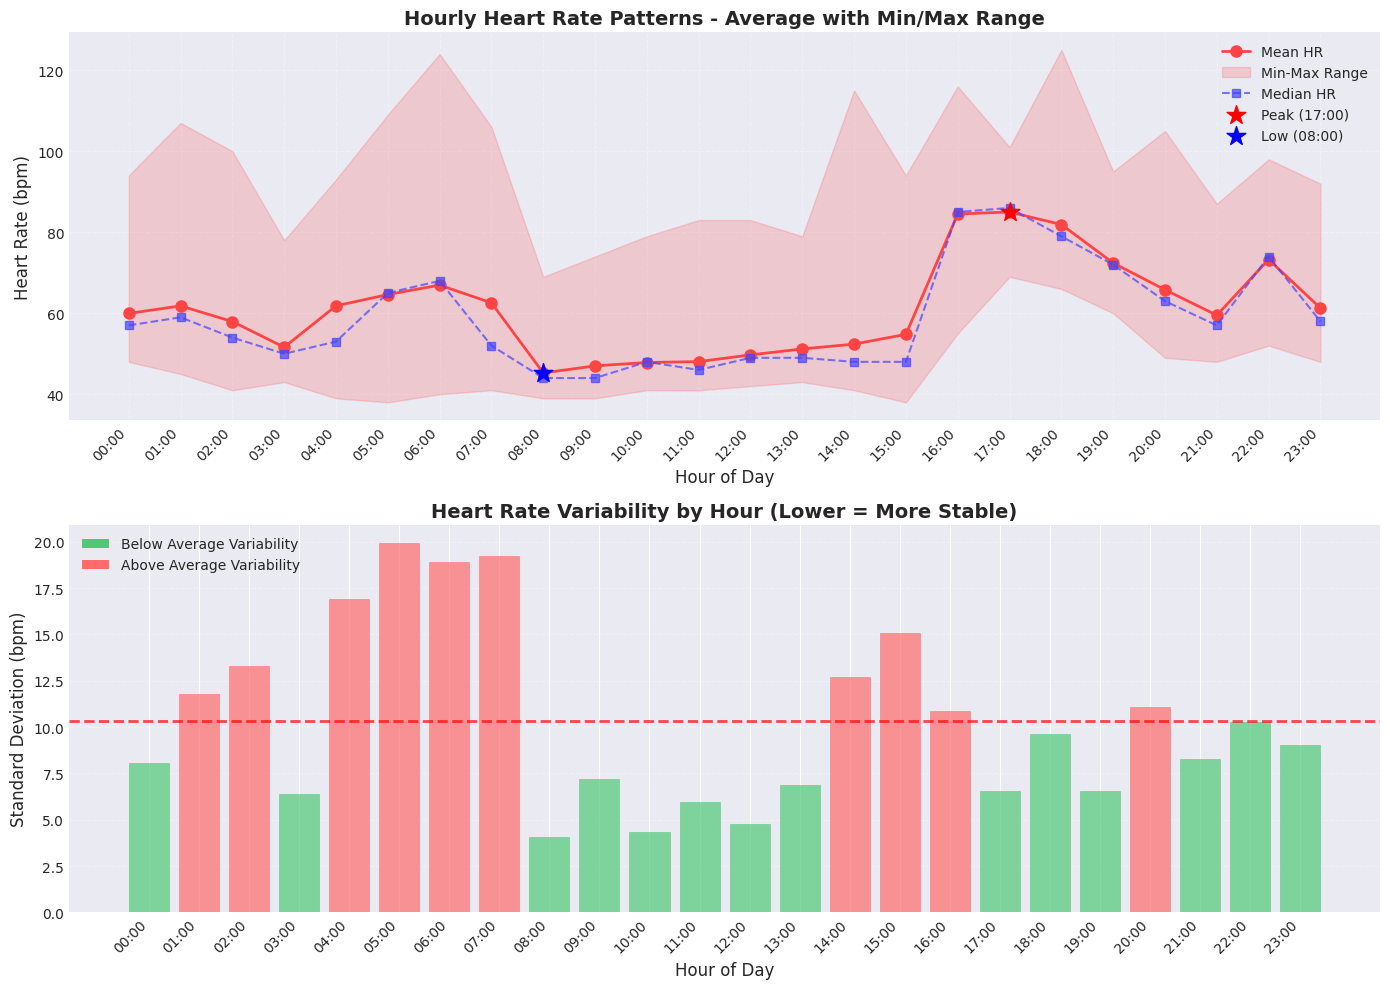

In [18]:
# Visualize hourly patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Hourly average with min/max band
ax1 = axes[0]
ax1.plot(hourly_stats['hour'], hourly_stats['mean'], marker='o', linewidth=2, 
         markersize=8, color='#ff4444', label='Mean HR')
ax1.fill_between(hourly_stats['hour'], hourly_stats['min'], hourly_stats['max'], 
                  alpha=0.2, color='#ff4444', label='Min-Max Range')
ax1.plot(hourly_stats['hour'], hourly_stats['median'], marker='s', linewidth=1.5, 
         markersize=6, color='#4444ff', linestyle='--', alpha=0.7, label='Median HR')

# Highlight peak and low hours
ax1.scatter(peak_hour['hour'], peak_hour['mean'], s=200, color='red', 
            marker='*', zorder=5, label=f"Peak ({int(peak_hour['hour']):02d}:00)")
ax1.scatter(low_hour['hour'], low_hour['mean'], s=200, color='blue', 
            marker='*', zorder=5, label=f"Low ({int(low_hour['hour']):02d}:00)")

ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Heart Rate (bpm)', fontsize=12)
ax1.set_title('Hourly Heart Rate Patterns - Average with Min/Max Range', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(range(0, 24))
ax1.set_xticklabels([f'{h:02d}:00' for h in range(0, 24)], rotation=45, ha='right')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='upper right', framealpha=0.9)

# Plot 2: Hourly variability (standard deviation)
ax2 = axes[1]
bars = ax2.bar(hourly_stats['hour'], hourly_stats['std'], 
               color='#4a90e2', alpha=0.7, edgecolor='black', linewidth=0.5)

# Color bars based on variability (high std = more variable)
colors = ['#50c878' if std < hourly_stats['std'].mean() else '#ff6b6b' 
          for std in hourly_stats['std']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax2.axhline(hourly_stats['std'].mean(), color='red', linestyle='--', 
            linewidth=2, alpha=0.7, label=f"Mean Std Dev: {hourly_stats['std'].mean():.1f}")
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Standard Deviation (bpm)', fontsize=12)
ax2.set_title('Heart Rate Variability by Hour (Lower = More Stable)', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24))
ax2.set_xticklabels([f'{h:02d}:00' for h in range(0, 24)], rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.legend(loc='upper right', framealpha=0.9)

# Add green/red legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#50c878', label='Below Average Variability'),
    Patch(facecolor='#ff6b6b', label='Above Average Variability')
]
ax2.legend(handles=legend_elements, loc='upper left', framealpha=0.9)

plt.tight_layout()
plt.show()

In [19]:
# Additional time-of-day insights
print("\n🕐 TIME-OF-DAY INSIGHTS")
print("=" * 80)

# Define period based on hour (Night spans 22-6, crossing midnight)
def get_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:  # 22-24 or 0-6
        return 'Night'

df_hr_intra['period'] = df_hr_intra['hour'].apply(get_period)

# Custom order for periods
period_order = ['Night', 'Morning', 'Afternoon', 'Evening']
period_stats = df_hr_intra.groupby('period')['value'].agg(['mean', 'min', 'max', 'std']).reindex(period_order)

print(f"{'Period':15} | {'Mean':>8} | {'Min':>6} | {'Max':>6} | {'Std Dev':>8}")
print("-" * 80)
for period, row in period_stats.iterrows():
    print(f"{period:15} | {row['mean']:8.1f} | {row['min']:6.0f} | {row['max']:6.0f} | {row['std']:8.1f}")

# Detect potential sleep period (consecutive hours with low HR)
sleep_threshold = hourly_stats['mean'].quantile(0.25)
potential_sleep_hours = hourly_stats[hourly_stats['mean'] < sleep_threshold]['hour'].tolist()
if potential_sleep_hours:
    print(f"\n💤 Potential Sleep Period (Low HR hours): {', '.join([f'{h:02d}:00' for h in potential_sleep_hours])}")
    print(f"   (Hours with mean HR < {sleep_threshold:.1f} bpm)")


🕐 TIME-OF-DAY INSIGHTS
Period          |     Mean |    Min |    Max |  Std Dev
--------------------------------------------------------------------------------
Night           |     61.6 |     38 |    109 |     13.9
Morning         |     53.4 |     39 |    124 |     15.0
Afternoon       |     62.1 |     38 |    116 |     18.4
Evening         |     69.4 |     48 |    125 |     12.1

💤 Potential Sleep Period (Low HR hours): 08:00, 09:00, 10:00, 11:00, 12:00, 13:00
   (Hours with mean HR < 51.5 bpm)


In [20]:
print(df_hr_zones[['time', 'Fat Burn', 'Cardio', 'Peak']].to_string())

                       time  Fat Burn  Cardio  Peak
0 2025-11-08 12:00:00+00:00       7.0     0.0   0.0


In [21]:
import matplotlib.dates as mdates

# Define heart rate zones
zones = {
    'Out of Range': {'range': (0, 93), 'color': '#e8f4f8'},
    'Fat Burn': {'range': (93, 128), 'color': '#fff4e6'},
    'Cardio': {'range': (128, 155), 'color': '#ffe8e8'},
    'Peak': {'range': (155, 220), 'color': '#ffe0e0'}
}

In [22]:
# ============================================================================
# OPTION 1: Heart Rate Timeline with Zone Overlays
# ============================================================================
def plot_hr_with_zones(df_hr_intra, df_hrv):
    """
    Plot intraday heart rate with zone overlays and HRV annotations
    """
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot zone bands as background
    for zone_name, zone_info in zones.items():
        ax.axhspan(zone_info['range'][0], zone_info['range'][1], 
                   alpha=0.3, color=zone_info['color'], label=zone_name)
    
    # Plot heart rate line
    ax.plot(df_hr_intra['time'], df_hr_intra['value'], 
            color='#ff4444', linewidth=1.5, label='Heart Rate', zorder=5)
    
    # Add HRV annotations if available
    if not df_hrv.empty:
        hrv_text = f"Daily RMSSD: {df_hrv['dailyRmssd'].iloc[0]:.1f} ms\n"
        hrv_text += f"Deep RMSSD: {df_hrv['deepRmssd'].iloc[0]:.1f} ms"
        ax.text(0.02, 0.98, hrv_text, transform=ax.transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', 
                facecolor='white', alpha=0.8), fontsize=10)
    
    # Formatting
    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Heart Rate (bpm)', fontsize=12)
    ax.set_title('Intraday Heart Rate with Zone Overlays', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.xticks(rotation=45)
    
    # Legend
    handles, labels = ax.get_legend_handles_labels()
    # Reorder to put HR first, then zones
    order = [-1] + list(range(len(handles)-1))
    ax.legend([handles[i] for i in order], [labels[i] for i in order],
              loc='upper right', framealpha=0.9)
    
    plt.tight_layout()
    return fig

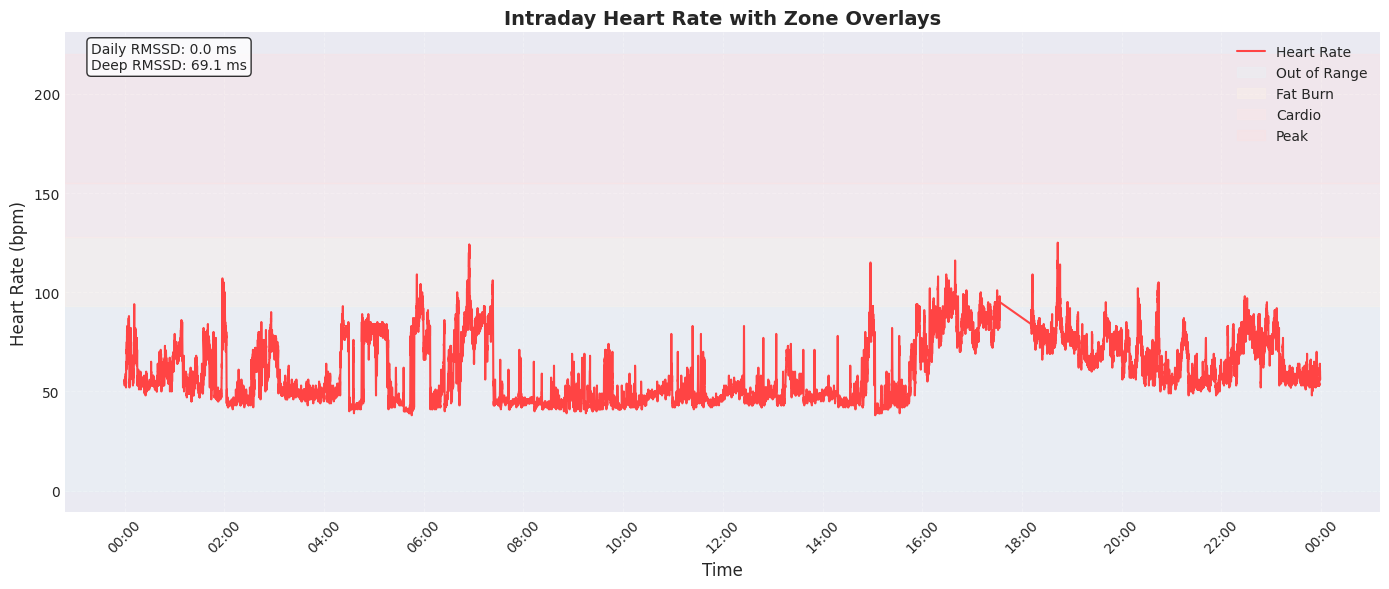

In [23]:
# Figure 1: Heart Rate with Zone Overlays
fig1 = plot_hr_with_zones(df_hr_intra, df_hrv)
plt.show()

In [24]:
# ============================================================================
# OPTION 2: Multi-Panel Dashboard
# ============================================================================
import numpy as np

def plot_dashboard(df_hr_intra, df_hrv, df_hr_zones):
    """
    Create a comprehensive multi-panel dashboard
    """
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
    
    # Panel 1: Intraday Heart Rate (spans both columns)
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(df_hr_intra['time'], df_hr_intra['value'], 
             color='#ff4444', linewidth=1.5)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Heart Rate (bpm)')
    ax1.set_title('Intraday Heart Rate', fontweight='bold')
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # Panel 2: HRV Metrics
    ax2 = fig.add_subplot(gs[1, 0])
    if not df_hrv.empty:
        hrv_metrics = ['dailyRmssd', 'deepRmssd']
        hrv_values = [df_hrv[metric].iloc[0] for metric in hrv_metrics]
        bars = ax2.bar(hrv_metrics, hrv_values, color=['#4a90e2', '#50c878'])
        ax2.set_ylabel('RMSSD (ms)')
        ax2.set_title('Heart Rate Variability', fontweight='bold')
        ax2.set_xticks(range(len(hrv_metrics)))
        ax2.set_xticklabels(['Daily RMSSD', 'Deep RMSSD'])
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom')
    
    # Panel 3: Heart Rate Zone Distribution
    ax3 = fig.add_subplot(gs[1, 1])
    if not df_hr_zones.empty:
        zone_names = ['Out of Range', 'Fat Burn', 'Cardio', 'Peak']
        zone_values = [df_hr_zones[zone].iloc[0] for zone in zone_names]
        colors_list = [zones[zone]['color'] for zone in zone_names]
        bars = ax3.bar(range(len(zone_names)), zone_values, 
                       color=colors_list, edgecolor='black', linewidth=1)
        ax3.set_ylabel('Minutes')
        ax3.set_title('Time in Heart Rate Zones', fontweight='bold')
        ax3.set_xticks(range(len(zone_names)))
        ax3.set_xticklabels(zone_names, rotation=45, ha='right')
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}', ha='center', va='bottom')
    
    # Panel 4: Heart Rate Distribution Histogram
    ax4 = fig.add_subplot(gs[2, :])
    hr_values = df_hr_intra['value'].values
    
    # Create histogram with zone colors
    bins = np.arange(df_hr_intra['value'].min(), df_hr_intra['value'].max() + 5, 5)
    n, bins_edges, patches = ax4.hist(hr_values, bins=bins, edgecolor='black', linewidth=0.5)
    
    # Color bars by zone
    for patch, left_edge in zip(patches, bins_edges[:-1]):
        mid_point = left_edge + 2.5
        for zone_name, zone_info in zones.items():
            if zone_info['range'][0] <= mid_point < zone_info['range'][1]:
                patch.set_facecolor(zone_info['color'])
                break
    
    ax4.set_xlabel('Heart Rate (bpm)')
    ax4.set_ylabel('Frequency')
    ax4.set_title('Heart Rate Distribution', fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # Add zone lines
    for zone_name, zone_info in zones.items():
        if zone_info['range'][0] > 0:
            ax4.axvline(zone_info['range'][0], color='gray', 
                       linestyle='--', alpha=0.5, linewidth=1)
    
    plt.suptitle('Fitbit Health Dashboard', fontsize=16, fontweight='bold', y=0.995)
    # plt.tight_layout()
    return fig

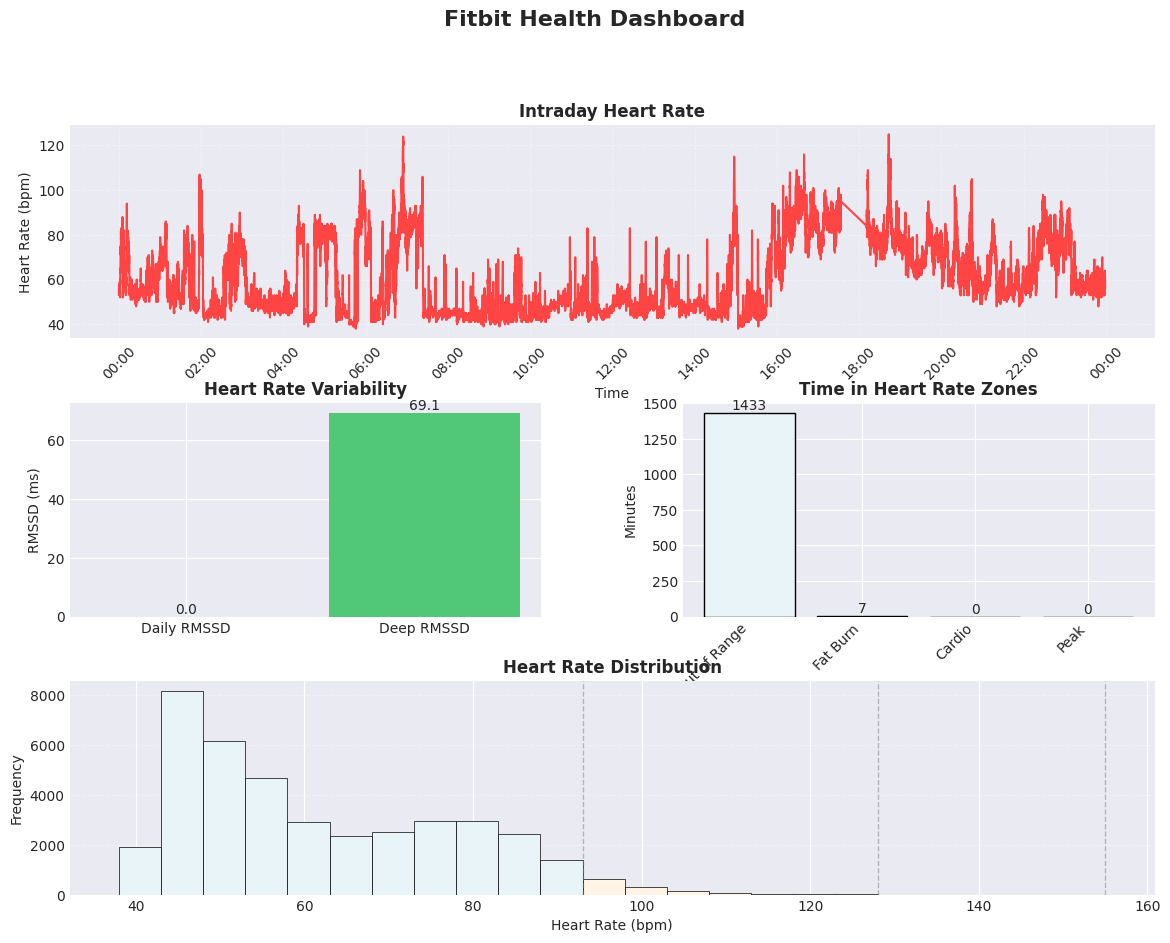

In [25]:
# Figure 2: Multi-Panel Dashboard
fig2 = plot_dashboard(df_hr_intra, df_hrv, df_hr_zones)
plt.show()

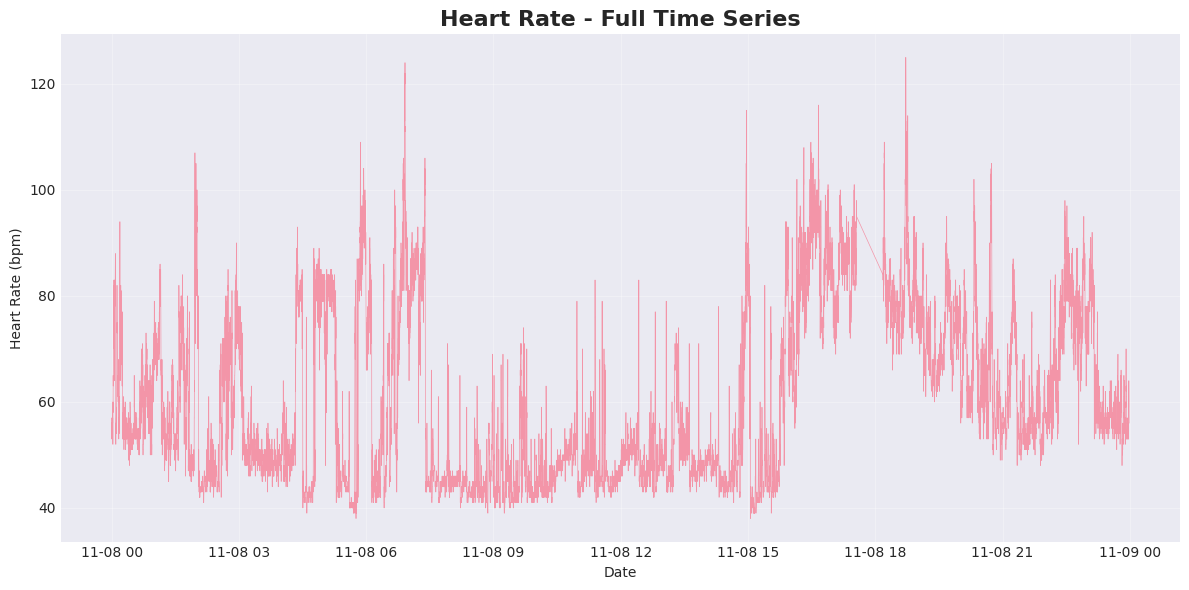

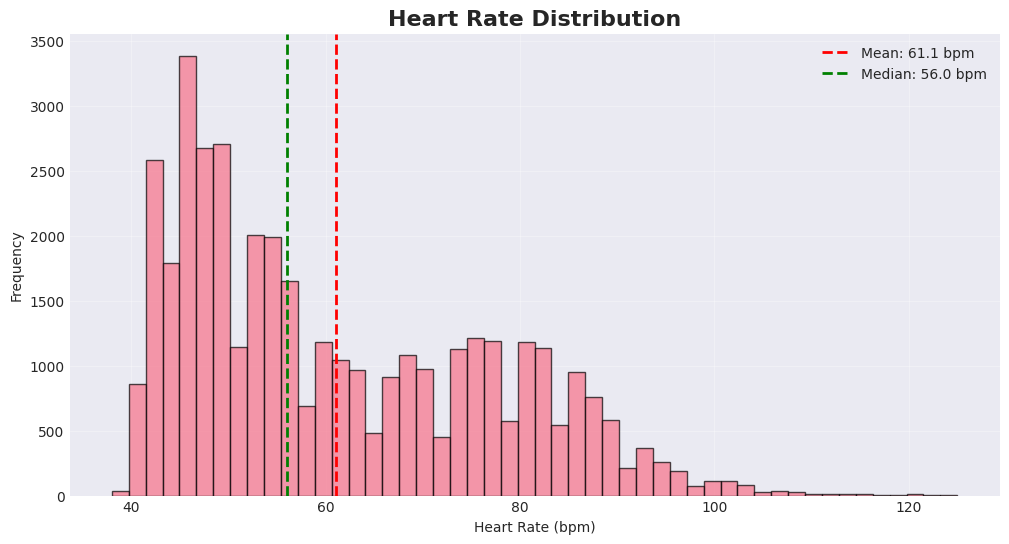

In [26]:
# =============================================================================
# SECTION 4: HEART RATE VISUALIZATION - Multi-day Analysis
# =============================================================================

if not df_hr_intra.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot 1: Full time series
    ax.plot(df_hr_intra['time'], df_hr_intra['value'], linewidth=0.5, alpha=0.7)
    ax.set_title('Heart Rate - Full Time Series', fontsize=16, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Heart Rate (bpm)')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Heart rate distribution
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.hist(df_hr_intra['value'], bins=50, edgecolor='black', alpha=0.7)
    ax.axvline(df_hr_intra['value'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_hr_intra["value"].mean():.1f} bpm')
    ax.axvline(df_hr_intra['value'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_hr_intra["value"].median():.1f} bpm')
    ax.set_title('Heart Rate Distribution', fontsize=16, fontweight='bold')
    ax.set_xlabel('Heart Rate (bpm)')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()